# Instituto Federal de Minas Gerais - Campus Ouro Preto

## Pós Graduação em Inteligência Artificial

## Trabalho Final

Disciplina: Análise e Previsão de Séries Temporais

Prof.: Prof. Dr. Carlos Severiano

Aluno: Pâmela Murta Castro Lima

In [1]:
# Importando bibliotecas essenciais para análise e previsão de séries temporais
import pandas as pd  # Manipulação e análise de dados
import numpy as np  # Operações matemáticas e trabalho com arrays
import matplotlib.pyplot as plt  # Visualização de dados
from statsmodels.tsa.arima.model import ARIMA  # Modelo ARIMA para séries temporais
from sklearn.metrics import mean_squared_error  # Métrica de erro para avaliação do modelo
from math import sqrt  # Função raiz quadrada para cálculo do RMSE
from datetime import datetime  # Manipulação de datas e tempo
from statsmodels.tsa.stattools import adfuller  # Teste de Dickey-Fuller para estacionariedade
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposição sazonal de séries temporais
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Gráficos de autocorrelação e autocorrelação parcial



# Introdução



As mudanças climáticas, impulsionadas principalmente pelas emissões de gases de efeito estufa, emergem como um dos desafios mais prementes da nossa era. Entre esses gases, o dióxido de carbono (CO2) destaca-se como um protagonista significativo no aumento das temperaturas médias globais. Este projeto se propõe a aprofundar nossa compreensão e antecipar as emissões de CO2, focalizando em quatro países específicos: Reino Unido, Brasil, China, Estados Unidos, além de uma perspectiva global.

As emissões humanas de CO2 surgem de diversas fontes, sendo a queima de combustíveis fósseis, a produção de materiais industriais, como aço e cimento, e práticas agrícolas, os principais catalisadores desse fenômeno. Compreender as dinâmicas dessas emissões torna-se essencial não apenas para a avaliação de impactos ambientais, mas também para a formulação de estratégias eficazes de mitigação.

# Base de Dados: Our World in Data



Os dados foram adquiridos do site Our World in Data, uma fonte confiável que oferece acesso a um conjunto de dados detalhados sobre emissões de CO2 per capita ao longo do tempo. Esta base é composta por:

* Year: Ano da medição.
* Entity: Nome do país ou categoria (Global).
* Annual CO₂ emissions (per capita): Quantidade de CO2 emitida per capita no ano.

Link: https://ourworldindata.org/explorers/co2

# Descrição do Problema:
O aumento das emissões de CO2 é um catalisador fundamental para as mudanças climáticas globais. Este projeto propõe-se a prever as emissões de CO2 individualmente para cada país mencionado, contrastando essas previsões com uma visão global. Essa abordagem permitirá a identificação de padrões específicos de cada nação em relação à tendência global.

## Modelagem de Séries Temporais:
O modelo ARIMA foi selecionado por sua adequação aos dados de séries temporais e sua capacidade de capturar padrões complexos. Os parâmetros do modelo foram ajustados empiricamente para refletir as especificidades das emissões de cada país estudado.

# Justificativa dos Países Selecionados:
A escolha dos países alvo - Estados Unidos, China, Reino Unido e Brasil - foi motivada por seus papéis significativos como grandes emissores de CO2. O Brasil foi incluído especificamente por ser o país de residência, adicionando uma dimensão pessoal e local à análise global.

In [2]:
# Definindo a função para carregar e filtrar os dados
def load_and_filter_data(file_path, countries, start_year, end_year):
    data = pd.read_csv(file_path)
    data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
    data = data[data['Entity'].isin(countries)]
    return data



In [3]:
# Definindo a função para plotar os gráficos de séries temporais
def plot_emissions(data, global_emissions):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

    for country in countries:
        ax1.plot(data[data['Entity'] == country]['Year'], 
                 data[data['Entity'] == country]['Annual CO₂ emissions (per capita)'],
                 label=country)
        
    ax2.plot(global_emissions.index, global_emissions.values, label='Global Emissions', linestyle='--', color='black')

    ax1.set_title('Emissões de CO₂ por País')
    ax2.set_title('Emissões Globais de CO₂')
    ax2.set_xlabel('Ano')
    ax1.set_ylabel('Emissões de CO₂ (per capita)')
    ax2.set_ylabel('Emissões de CO₂ (per capita)')
    ax1.legend()
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [4]:
# Função para verificar a estacionariedade
def check_stationarity(data, country_name='Global'):
    result = adfuller(data)
    print(f'ADF Statistic for {country_name}:', result[0])
    print(f'p-value for {country_name}:', result[1])
    print(f'Critical Values for {country_name}:', result[4])
    
    if result[1] <= 0.05:
        print(f'A série para {country_name} é estacionária.')
    else:
        print(f'A série para {country_name} não é estacionária.')


In [5]:
# Função para aplicar a diferenciação sazonal
def difference_with_seasonal(data, interval):
    diff = np.array(data)
    for i in range(interval, len(data)):
        diff[i] = data[i] - data[i - interval]
    return diff[interval:]

In [6]:
# Função para realizar a segunda diferenciação sazonal
def second_difference_with_seasonal(data, interval):
    first_diff = difference_with_seasonal(data, interval)
    second_diff = difference_with_seasonal(first_diff, interval)
    return second_diff


In [7]:
# Função para plotar a decomposição da série temporal
def plot_decomposition(data, country_name='Global'):
    decomposition = seasonal_decompose(data, model='additive', period=1)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(4, 1, 1)
    plt.plot(data, label='Original')
    plt.legend()
    
    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Trend')
    plt.legend()
    
    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()
    
    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Residual')
    plt.legend()
    
    plt.suptitle(f'Decomposição da Série Temporal para {country_name}')
    plt.show()


In [8]:
# Função para plotar a autocorrelação e autocorrelação parcial
def plot_autocorrelation(data, country_name):
    max_lags = 10  # Ajuste este valor conforme necessário

    # Plotar autocorrelação e autocorrelação parcial
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plot_acf(data, lags=max_lags, ax=plt.gca(), title=f'Autocorrelation for {country_name}')

    plt.subplot(1, 2, 2)
    # Reduza o número de lags para o mínimo entre 50% do tamanho da amostra e max_lags
    max_lags_pacf = min(int(0.5 * len(data)), max_lags)
    plot_pacf(data, lags=max_lags_pacf, ax=plt.gca(), title=f'Partial Autocorrelation for {country_name}')

    plt.show()


In [9]:
# Lista de países para análise, incluindo 'Global'
countries = ['United States', 'China', 'United Kingdom', 'Brazil', 'Global']


In [10]:
# Carregando e filtrando os dados
file_path = "co-emissions-per-capita.csv"
start_year = 2000
end_year = 2022
countries = ['United States', 'China', 'United Kingdom', 'Brazil']
data = load_and_filter_data(file_path, countries, start_year, end_year)


In [11]:
# Agrupando por ano e somando as emissões
global_emissions = data.groupby('Year')['Annual CO₂ emissions (per capita)'].sum()



In [12]:
data.info()

# Estatísticas descritivas
data.describe()

data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 3914 to 25278
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             92 non-null     object 
 1   Code                               92 non-null     object 
 2   Year                               92 non-null     int64  
 3   Annual CO₂ emissions (per capita)  92 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB


,Entity,Code,Year,Annual CO₂ emissions (per capita)
3914,Brazil,BRA,2000,1.934246
3915,Brazil,BRA,2001,1.942441
3916,Brazil,BRA,2002,1.926925
3917,Brazil,BRA,2003,1.887129
3918,Brazil,BRA,2004,1.956637


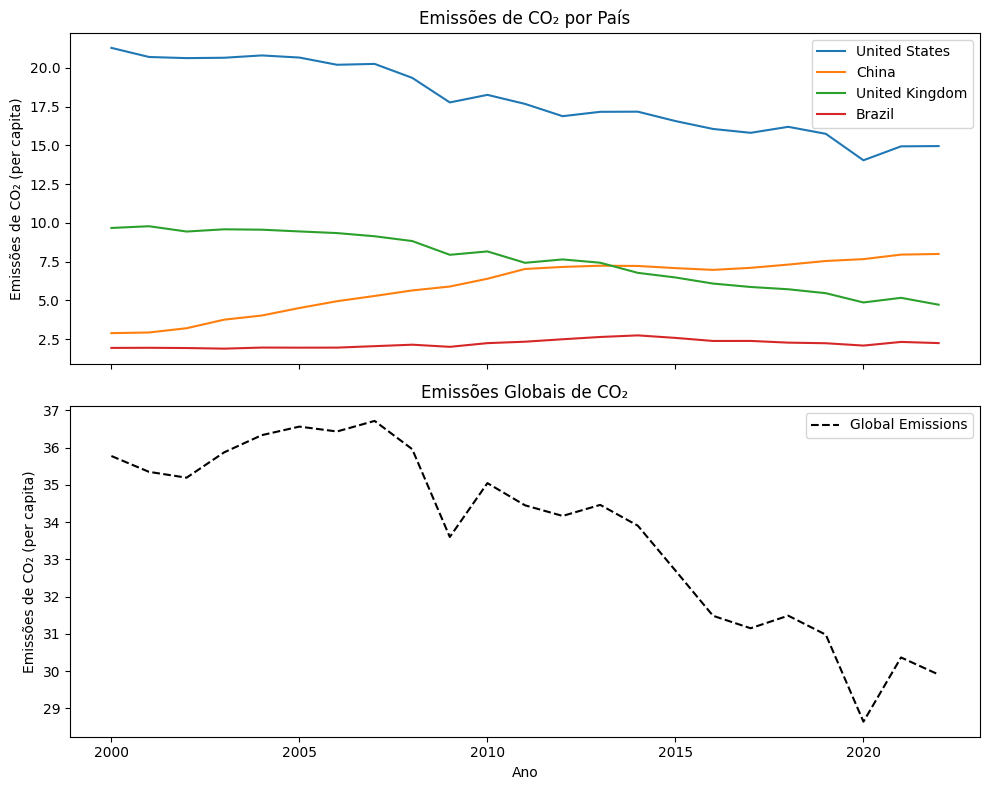

In [13]:
# Visualização dos dados

# Agrupando por ano e somando as emissões
global_emissions = data.groupby('Year')['Annual CO₂ emissions (per capita)'].sum()

# Plotando gráficos de séries temporais
plot_emissions(data, global_emissions)


Estados Unidos: Mostra uma tendência geral de diminuição nas emissões ao longo do tempo.
China: Apresenta um aumento nas emissões.
Reino Unido: Tem uma tendência de queda.
Brasil: Permanece relativamente estável e baixo em comparação com os outros países.
Global: Mostra uma tendência geral de diminuição nas emissões ao longo do tempo.

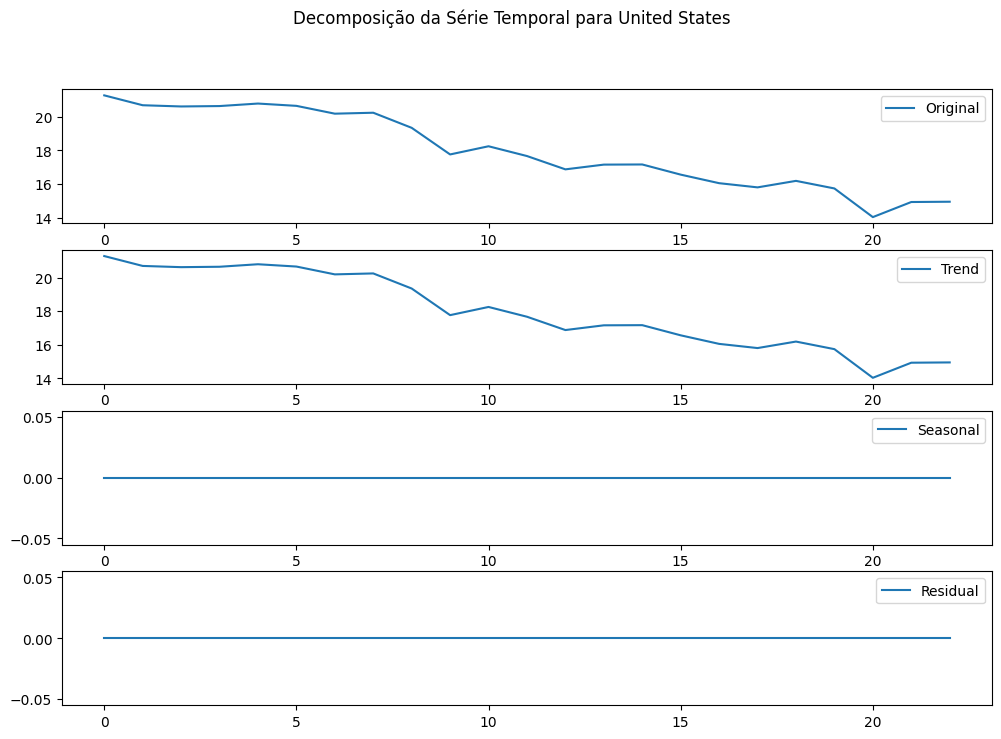

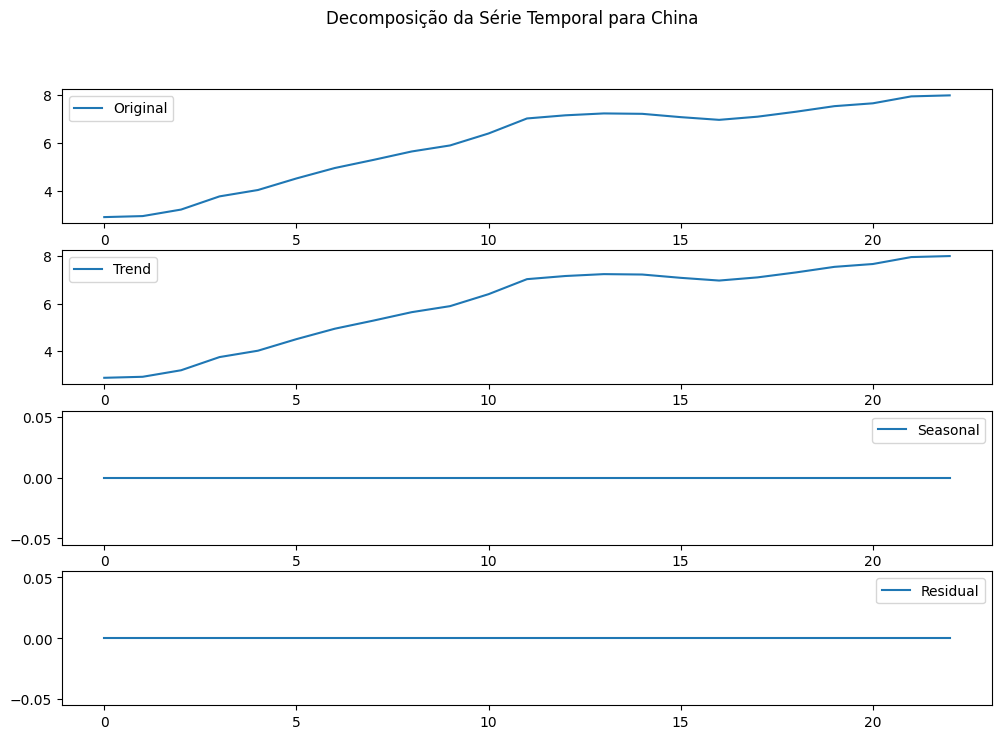

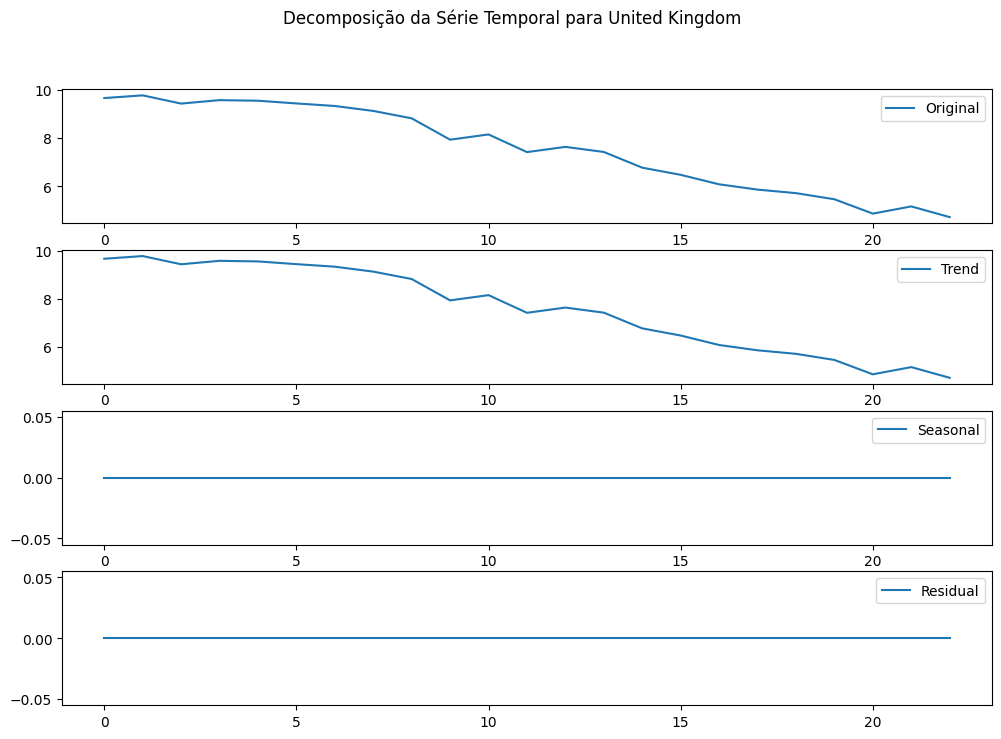

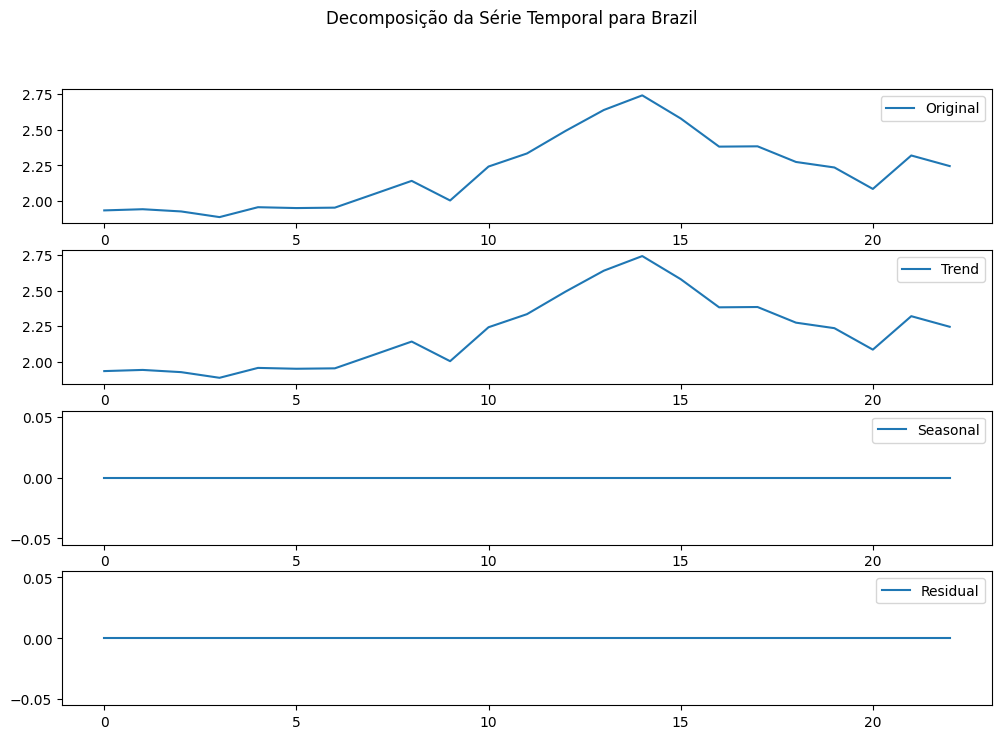

In [14]:
 # Plotar decomposição da série temporal para cada país
for country in countries:
    if country == 'Global':
        country_data = global_emissions.values
    else:
        country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
    
    plot_decomposition(country_data, country_name=country)


Cada gráfico de decomposição sugere que as emissões de CO2 são predominantemente influenciadas por tendências de longo prazo, e não por sazonalidade. As tendências refletem as políticas e o desenvolvimento econômico de cada país. A ausência de sazonalidade e resíduos baixos sugere que as emissões de CO2 são relativamente previsíveis com base na tendência histórica e não são significativamente afetadas por fatores sazonais ou irregulares a curto prazo.

In [16]:
# Verificar estacionariedade para cada país e a emissão global
for country in countries:
    if country == 'Global':
        country_data = global_emissions.values
    else:
        country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
    
    # Aplicar o teste ADF
    check_stationarity(country_data, country_name=country)
    print('\n')



ADF Statistic for United States: -1.4190901870625774
p-value for United States: 0.5730906011043135
Critical Values for United States: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
A série para United States não é estacionária.


ADF Statistic for China: -4.374100081022279
p-value for China: 0.0003297778237238771
Critical Values for China: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
A série para China é estacionária.


ADF Statistic for United Kingdom: -1.2950275593858571
p-value for United Kingdom: 0.6314441297002356
Critical Values for United Kingdom: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
A série para United Kingdom não é estacionária.


ADF Statistic for Brazil: -1.7168924639942953
p-value for Brazil: 0.4224306591919345
Critical Values for Brazil: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}
A série para Brazil não é estacionária.




In [17]:
# Aplicar diferenciação sazonal
for country in countries:
    if country == 'Global':
        country_data = global_emissions.values
    else:
        country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
    
    # Aplicar diferenciação sazonal, apenas para os países que não são estacionários
    stationarity_result = adfuller(country_data)
    
    if stationarity_result is not None and stationarity_result[1] > 0.05:
        seasonal_diff_country_data = difference_with_seasonal(country_data, interval=1)
        
        # Aplicar o teste ADF novamente após a diferenciação
        print(f'Após a diferenciação para {country}:')
        check_stationarity(seasonal_diff_country_data, country_name=country)
        print('\n')

Após a diferenciação para United States:
ADF Statistic for United States: -1.966811716647517
p-value for United States: 0.30131184687777723
Critical Values for United States: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
A série para United States não é estacionária.


Após a diferenciação para United Kingdom:
ADF Statistic for United Kingdom: -5.4055527353730195
p-value for United Kingdom: 3.297420728786283e-06
Critical Values for United Kingdom: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
A série para United Kingdom é estacionária.


Após a diferenciação para Brazil:
ADF Statistic for Brazil: -1.9861450106190826
p-value for Brazil: 0.2926808752702343
Critical Values for Brazil: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
A série para Brazil não é estacionária.




In [18]:
# Aplicar segunda diferenciação sazonal
for country in countries:
    if country in ['United States', 'Brazil']:
        country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
        
        # Aplicar a segunda diferenciação sazonal
        second_diff_country_data = second_difference_with_seasonal(country_data, interval=1)
        
        # Aplicar o teste ADF após a segunda diferenciação
        print(f'Após a segunda diferenciação para {country}:')
        check_stationarity(second_diff_country_data, country_name=country)
        print('\n')

Após a segunda diferenciação para United States:
ADF Statistic for United States: -3.0118098873466135
p-value for United States: 0.033806127852536325
Critical Values for United States: {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}
A série para United States é estacionária.


Após a segunda diferenciação para Brazil:
ADF Statistic for Brazil: -8.009032303838351
p-value for Brazil: 2.2270638089705025e-12
Critical Values for Brazil: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}
A série para Brazil é estacionária.




In [19]:
# Função para realizar a segunda diferenciação sazonal
def second_difference_with_seasonal(data, interval):
    first_diff = difference_with_seasonal(data, interval)
    second_diff = difference_with_seasonal(first_diff, interval)
    return second_diff

# Lista de países que ainda não são estacionários
countries_nao_estacionarios = ['United States', 'Brazil']

# Aplicar segunda diferenciação sazonal
for country in countries_nao_estacionarios:
    country_data = data[data['Entity'] == country].groupby('Year')['Annual CO₂ emissions (per capita)'].sum().values
    
    # Aplicar a segunda diferenciação sazonal
    second_diff_country_data = second_difference_with_seasonal(country_data, interval=1)
    
    # Aplicar o teste ADF após a segunda diferenciação
    print(f'Após a segunda diferenciação para {country}:')
    check_stationarity(second_diff_country_data, country_name=country)
    print('\n')


Após a segunda diferenciação para United States:
ADF Statistic for United States: -3.0118098873466135
p-value for United States: 0.033806127852536325
Critical Values for United States: {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}
A série para United States é estacionária.


Após a segunda diferenciação para Brazil:
ADF Statistic for Brazil: -8.009032303838351
p-value for Brazil: 2.2270638089705025e-12
Critical Values for Brazil: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}
A série para Brazil é estacionária.




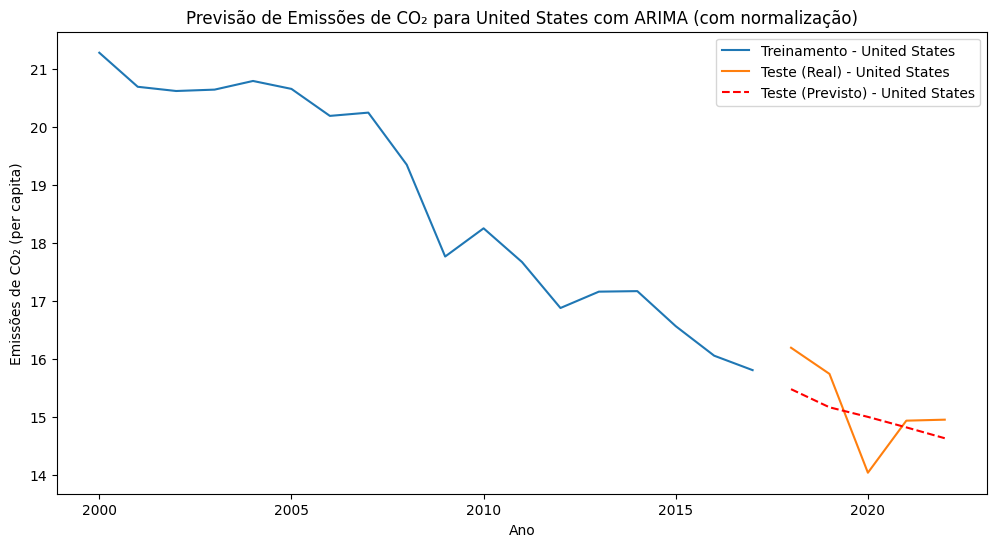

Mean Squared Error for United States: 0.3777
Root Mean Squared Error for United States: 0.6146


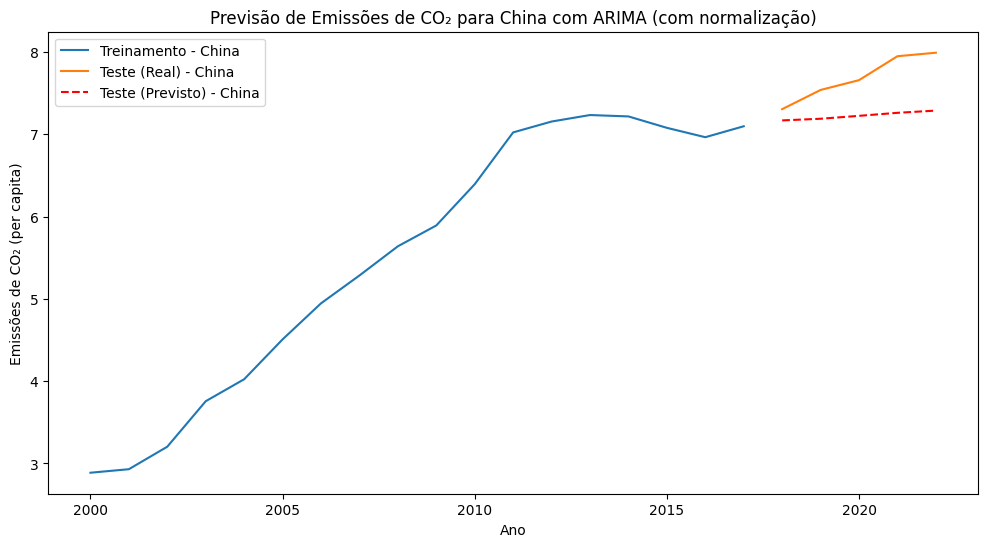

Mean Squared Error for China: 0.2595
Root Mean Squared Error for China: 0.5095


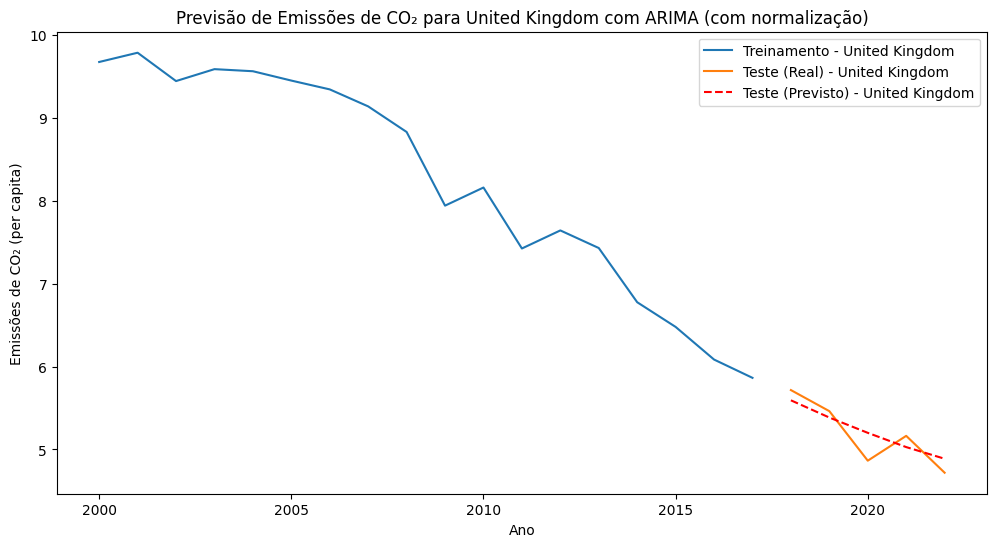

Mean Squared Error for United Kingdom: 0.0361
Root Mean Squared Error for United Kingdom: 0.1899


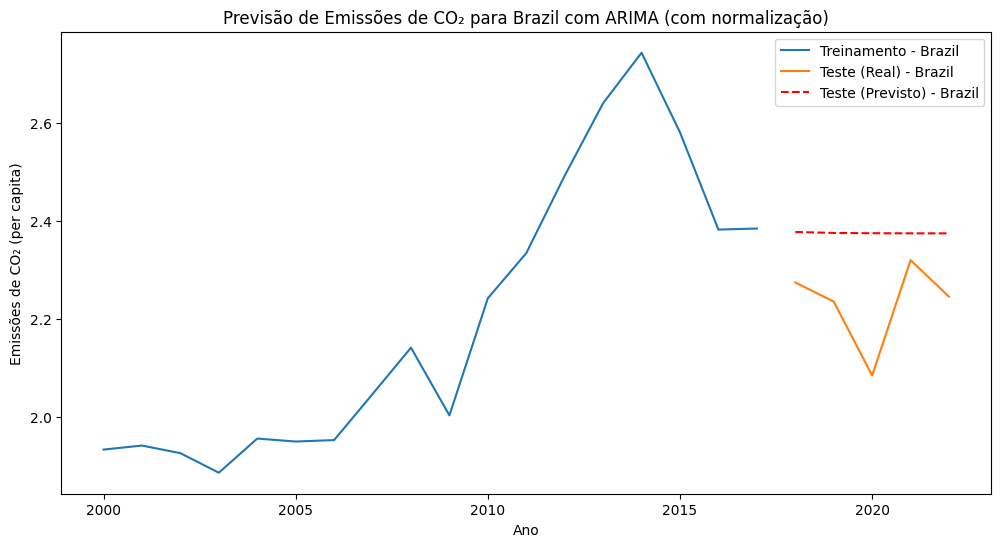

Mean Squared Error for Brazil: 0.0267
Root Mean Squared Error for Brazil: 0.1634


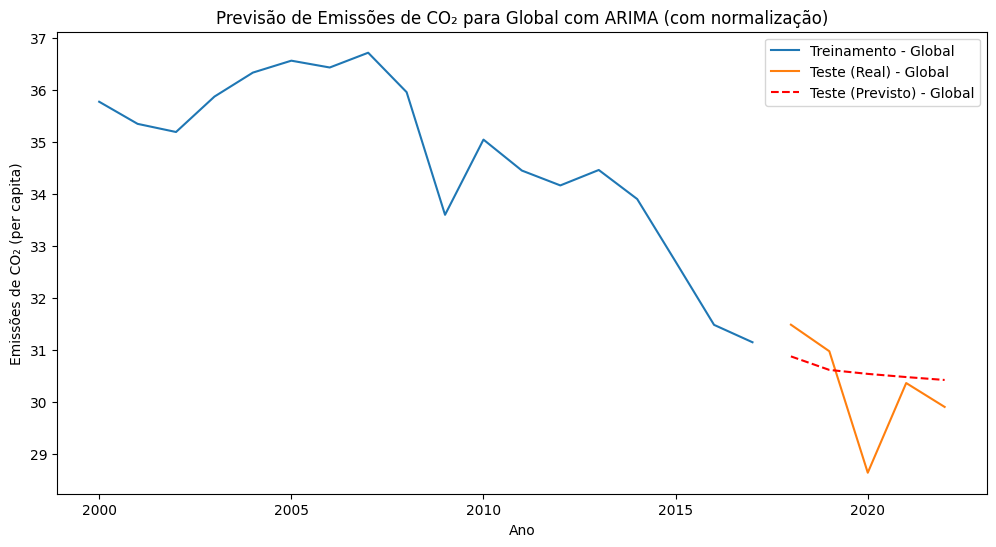

Mean Squared Error for Global: 0.8778
Root Mean Squared Error for Global: 0.9369


In [20]:

# Lista de países para análise, incluindo 'Global'
countries = ['United States', 'China', 'United Kingdom', 'Brazil', 'Global']

# Consolidar previsões para todos os países
consolidated_predictions = {}

# Dividir os dados em conjunto de treinamento e teste para cada país
for country in countries:
    if country == 'Global':
        country_data = global_emissions.reset_index()
    else:
        country_data = data[data['Entity'] == country]

    X = country_data['Year']
    y = country_data['Annual CO₂ emissions (per capita)'].values

    # Normalizar os dados
    mean_y, std_y = y.mean(), y.std()
    y_normalized = (y - mean_y) / std_y

    train_size = int(len(y) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y_normalized[:train_size], y_normalized[train_size:]

    # Aplicar a técnica de ARIMA
    order = (3,1,0)  # Parâmetros do ARIMA (p, d, q)
    model = ARIMA(y_train, order=order)
    fit_model = model.fit()

    # Fazer previsões no conjunto de teste
    y_pred = fit_model.forecast(steps=len(X_test))

    # Desnormalizar as previsões
    y_pred = (y_pred * std_y) + mean_y

    # Calcular métricas de avaliação
    mse = mean_squared_error(y[y_train.shape[0]:], y_pred)
    rmse = sqrt(mse)

    # Adicionar as previsões ao dicionário consolidado
    consolidated_predictions[country] = {
        'X_test': X_test,
        'y_test': y[y_train.shape[0]:],
        'y_pred': y_pred,
        'mse': mse,
        'rmse': rmse
    }

    # Plotar o gráfico para cada país
    plt.figure(figsize=(12, 6))
    plt.plot(X_train, y[:y_train.shape[0]], label=f'Treinamento - {country}')
    plt.plot(X_test, y[y_train.shape[0]:], label=f'Teste (Real) - {country}')
    plt.plot(X_test, y_pred, label=f'Teste (Previsto) - {country}', linestyle='--', color='red')
    plt.title(f'Previsão de Emissões de CO₂ para {country} com ARIMA (com normalização)')
    plt.xlabel('Ano')
    plt.ylabel('Emissões de CO₂ (per capita)')
    plt.legend()
    plt.show()

    # Exibir métricas de avaliação
    print(f'Mean Squared Error for {country}: {mse:.4f}')
    print(f'Root Mean Squared Error for {country}: {rmse:.4f}')

 



Analisando os valores de Erro Quadrático Médio (MSE) e Raiz do Erro Quadrático Médio (RMSE) em conjunto com as previsões gráficas para cada país e globalmente:

Estados Unidos:
MSE: 0.3777
RMSE: 0.6146
A previsão para os Estados Unidos mostra um desvio considerável dos dados reais, o que é refletido no valor relativamente alto do RMSE. Isso indica que o modelo pode não estar capturando todos os padrões ou influências nos dados, resultando em previsões menos precisas.
China:
MSE: 0.2595
RMSE: 0.5095
Para a China, embora o RMSE seja menor que o dos Estados Unidos, ainda há um desvio significativo nas previsões, principalmente na incapacidade do modelo de capturar a estabilização recente das emissões. Isso sugere que o modelo pode estar sobrecarregando a tendência anterior de crescimento.
Reino Unido:
MSE: 0.0361
RMSE: 0.1899
O RMSE relativamente baixo para o Reino Unido indica que as previsões são mais próximas dos dados reais. No entanto, ainda há uma divergência nos últimos pontos, o que pode indicar mudanças recentes nas tendências de emissões que o modelo não antecipou.
Brasil:
MSE: 0.0267
RMSE: 0.1634
O Brasil tem o menor RMSE entre os países analisados, o que sugere que as previsões estão mais alinhadas com os dados reais. Apesar disso, o gráfico mostra que o modelo não conseguiu capturar a volatilidade recente, apontando para a necessidade de ajustes ou modelos mais sofisticados que possam lidar com tais flutuações.
Global:
MSE: 0.8778
RMSE: 0.9369
As previsões globais têm o maior RMSE, indicando a maior discrepância entre os valores previstos e reais. Isso pode ser devido à complexidade de modelar um conjunto de dados tão heterogêneo, onde diferentes padrões nacionais de emissões podem estar interagindo de maneiras complexas.

# Análise dos Resultados

A fase de experimentação e análise dos resultados é crucial para avaliar a eficácia do modelo ARIMA na previsão das emissões de CO₂ para os países selecionados. A seguir, são apresentados os passos e as métricas relevantes para cada etapa do processo.

*  Divisão Treinamento e Teste
Os dados foram divididos em conjuntos de treinamento e teste, representando 80% e 20% dos dados, respectivamente. O treinamento foi realizado nos dados históricos, enquanto o teste foi reservado para avaliar o desempenho do modelo em prever dados não vistos

* Experimentos
Modelagem ARIMA
O modelo ARIMA (AutoRegressive Integrated Moving Average) foi escolhido como a abordagem principal para a previsão das séries temporais. Os parâmetros (p, d, q) foram ajustados empiricamente para cada país durante o treinamento do modelo.

* Métricas de Avaliação
Foram utilizadas duas métricas principais para avaliar a precisão das previsões:

Erro Quadrático Médio (MSE): Mede a média dos quadrados dos erros entre os valores reais e os previstos.
Raiz do Erro Quadrático Médio (RMSE): Representa a raiz quadrada do MSE, fornecendo uma métrica mais interpretável, pois está na mesma escala que os dados originais.
Resultados
Aqui estão as métricas de avaliação para cada país:




* Conclusões

Neste estudo, aplicamos o modelo ARIMA para prever as emissões de CO₂, alcançando um RMSE que variou entre 0.1634 a 0.9369. Os resultados destacam uma performance mais acurada para países como o Reino Unido e Brasil, onde o modelo parece ter capturado de forma eficaz as tendências das emissões. Especificamente, o baixo RMSE para o Brasil sugere uma correspondência notável entre as previsões do modelo e os dados reais, apesar de certa volatilidade recente não capturada. Para o Reino Unido, o modelo também se mostrou confiável, embora alterações recentes nas tendências de emissões possam ter sido subestimadas.

Em contraste, as previsões para os Estados Unidos e China apresentaram maior RMSE, refletindo discrepâncias significativas entre as previsões e os dados reais, possivelmente devido a uma simplificação excessiva das tendências de crescimento ou declínio contínuos. A previsão global revelou o maior RMSE, evidenciando as complexidades inerentes ao modelar um fenômeno tão diversificado quanto as emissões de CO₂ em uma escala global.

* Próximos Passos

Para melhorar a precisão das previsões, é imperativo explorar modelos mais sofisticados. Modelos de aprendizado profundo, como redes neurais recorrentes (RNNs) e Long Short-Term Memory networks (LSTMs), podem ser particularmente promissores devido à sua capacidade de capturar relações não lineares e dependências de longo prazo nos dados. Além disso, é recomendável a incorporação de variáveis exógenas nos modelos, como índices econômicos, políticas ambientais e eventos climáticos, para enriquecer a análise e aprofundar nossa compreensão das forças motrizes por trás das emissões de CO₂.

.

